<a href="https://colab.research.google.com/github/HammadD98/Modulo2-bootcamp-/blob/main/Notebooks/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker
from datetime import date


In [2]:
url = 'https://raw.githubusercontent.com/HammadD98/Modulo2-bootcamp-/main/Dados/teste1.csv'

# PROJETO 2 - BOOTCAMP ALURA DE DADOS
<br> IMUNIZAÇÕES - COBERTURA - BRASIL
<br>Coberturas Vacinais por Ano segundo Unidade da Federação
<br>Período: 1994-2019
<br>link = http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def

## A analise dos dados tem como objetivos:
     - Explorar os dados
     - Analisar a a região sul e o Rio Grande do Sul. 
     - Analisar a case de 2012(O qual foi descoberto atraves da exploração dos dados)


Etapas:<br>
&emsp;1 - Exploração <br>
&emsp;&emsp; 1.1 Importações das bibliotecas<br>
&emsp;&emsp; 1.2 Leitura dos dados<br>
&emsp;&emsp; 1.3 exploração e tartamento<br>



&emsp; 2 - Analise Explanatoria l<br>
&emsp;&emsp; 2.1 Analises gerais<br>
&emsp;&emsp; 2.2 Analise da região sul <br>
&emsp;&emsp; 2.3 Rio Grande do Sul<br>

&emsp; 3 - Conclusões <br>

&emsp; 4 - Trabalhos futuros <br>

## Analise Exploratoria

In [3]:
dados = pd.read_csv(url, encoding="ISO-8859-1", 
                     sep=',', skipfooter=18, skiprows = 3,
                    thousands=".", decimal=",", engine="python")
dados

,Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,150744,169930,260583,221136,254228,511993,595405,634672,603409,567875,732052,698279,702254,671022,670070,681503,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707,13579585
1,12 Acre,22658,57518,45907,78576,79331,240690,245193,281863,309201,300787,378766,353552,349014,386861,379638,390602,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891,6538933
2,13 Amazonas,127265,236612,279674,427850,430178,1013496,1198384,1327220,1360736,1270370,1581187,1613814,1685221,1704003,1647149,1703841,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366,31196446
3,14 Roraima,38382,56559,58502,51558,64159,139177,187080,162704,171102,168107,220949,210400,207007,218408,203350,225293,216961,146403,134478,137917,223255,261569,223781,223177,237162,146819,4334259
4,15 Pará,440625,552664,722825,890749,914640,2585184,2886309,3182573,3209151,3183958,4313926,3928530,4003528,3997712,3856972,3699454,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432,64447319
5,16 Amapá,-,32559,43911,54202,80449,205472,232258,342676,256112,263949,342556,323676,326160,326178,319122,354299,318085,200416,201291,235158,291264,317476,309878,240586,241570,165800,6025103
6,17 Tocantins,-,-,162309,132414,209755,500080,557200,591184,557207,529390,641107,633116,648132,647636,625972,629942,599042,393544,364498,419059,520696,500465,473930,496697,469306,337453,11640134
7,21 Maranhão,395000,482285,567243,700146,802799,2231202,2453795,2754985,2714036,2698158,3305897,3300894,3338694,3478280,3335303,3299816,3420909,1938353,1834049,2049197,2506954,2470155,1768910,1804725,1808791,1123803,56584379
8,22 Piauí,327096,288726,284130,308842,348572,1045207,1208893,1260538,1247873,1175552,1494494,1380359,1409417,1409679,1340657,1344452,1274272,790815,767241,830563,929808,843986,766717,794144,813143,520133,24205309
9,23 Ceará,708696,731122,894330,1092139,958365,3180674,3403095,3464853,3335843,3134287,3773711,3637003,3555125,3578539,3408148,3436035,3358407,1973183,1875068,2162076,3097412,3090798,2772563,2527779,2596746,1559778,67305775


In [4]:
dados = dados.drop(dados.columns[[1, 2, 3,-1]], axis=1) 
dados.head()


,Unidade da Federação,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,11 Rondônia,221136,254228,511993,595405,634672,603409,567875,732052,698279,702254,671022,670070,681503,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707
1,12 Acre,78576,79331,240690,245193,281863,309201,300787,378766,353552,349014,386861,379638,390602,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891
2,13 Amazonas,427850,430178,1013496,1198384,1327220,1360736,1270370,1581187,1613814,1685221,1704003,1647149,1703841,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366
3,14 Roraima,51558,64159,139177,187080,162704,171102,168107,220949,210400,207007,218408,203350,225293,216961,146403,134478,137917,223255,261569,223781,223177,237162,146819
4,15 Pará,890749,914640,2585184,2886309,3182573,3209151,3183958,4313926,3928530,4003528,3997712,3856972,3699454,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432


Verificando se ficou com inconsitencia na coluna total

In [5]:
dados[:-1].sum().head()


Unidade da Federação    11 Rondônia12 Acre13 Amazonas14 Roraima15 Pará...
1997                                                             19655709
1998                                                             20327528
1999                                                             61179053
2000                                                             67270520
dtype: object

A linha 'total' esta certo

In [6]:
# dados.T[:-1].sum().head()


Já a coluna 'total' ficou inconstistente devido a retirada de tres anos (94,95,96), a coluna será removida e posterioremte sera feita outra com os novos valores.

In [7]:
dados = dados.rename(columns={'Unidade da Federação':'uf'})

dados

,uf,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,11 Rondônia,221136,254228,511993,595405,634672,603409,567875,732052,698279,702254,671022,670070,681503,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707
1,12 Acre,78576,79331,240690,245193,281863,309201,300787,378766,353552,349014,386861,379638,390602,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891
2,13 Amazonas,427850,430178,1013496,1198384,1327220,1360736,1270370,1581187,1613814,1685221,1704003,1647149,1703841,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366
3,14 Roraima,51558,64159,139177,187080,162704,171102,168107,220949,210400,207007,218408,203350,225293,216961,146403,134478,137917,223255,261569,223781,223177,237162,146819
4,15 Pará,890749,914640,2585184,2886309,3182573,3209151,3183958,4313926,3928530,4003528,3997712,3856972,3699454,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432
5,16 Amapá,54202,80449,205472,232258,342676,256112,263949,342556,323676,326160,326178,319122,354299,318085,200416,201291,235158,291264,317476,309878,240586,241570,165800
6,17 Tocantins,132414,209755,500080,557200,591184,557207,529390,641107,633116,648132,647636,625972,629942,599042,393544,364498,419059,520696,500465,473930,496697,469306,337453
7,21 Maranhão,700146,802799,2231202,2453795,2754985,2714036,2698158,3305897,3300894,3338694,3478280,3335303,3299816,3420909,1938353,1834049,2049197,2506954,2470155,1768910,1804725,1808791,1123803
8,22 Piauí,308842,348572,1045207,1208893,1260538,1247873,1175552,1494494,1380359,1409417,1409679,1340657,1344452,1274272,790815,767241,830563,929808,843986,766717,794144,813143,520133
9,23 Ceará,1092139,958365,3180674,3403095,3464853,3335843,3134287,3773711,3637003,3555125,3578539,3408148,3436035,3358407,1973183,1875068,2162076,3097412,3090798,2772563,2527779,2596746,1559778


In [8]:
dados = dados.set_index("uf")
dados.index = dados.index.str[3:]

Ordenar por total

In [9]:
dados['Total'] = dados.sum(axis=1)
dados_por_total = dados.sort_values("Total", ascending=False)
dados_por_total = dados_por_total.drop("Total", axis=1)
dados_por_total = dados_por_total.drop("al", axis=0)
dados_por_total.head()


,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,4052597,4325523,12673295,13842017,13526097,12763696,12355211,14952220,14359891,14512994,14465201,14273089,14739743,14671666,9151228,8821199,10297960,13755784,13859265,10615615,11187566,11407247,7249108
Minas Gerais,1796982,1813559,6477184,6961244,7888036,6637190,6206032,7495444,7335918,7275695,7274762,7066647,7223274,7414886,4334695,3998586,4784266,5908170,5849587,5192087,5320343,5380265,3396051
Bahia,1358301,1484387,4745022,5131168,5641897,5316305,5128938,7135200,6057144,5968643,5877705,5676499,5812462,5651502,3319588,3222132,3568011,4552090,4326712,3231420,3317966,3165767,1933369
Rio de Janeiro,1409487,1519764,4872715,5385808,5263389,5118198,4888554,5935843,5737326,5590987,5644703,5418391,5589928,5397199,3271147,3034612,3452853,4792974,4947569,4269415,4170602,3678944,1506798
Paraná,1258159,1056241,3018261,3750742,3771473,3547068,3317332,4267323,3820725,3912713,3938642,3806543,3934622,3911435,2415754,2330836,2728430,3393790,3425656,2978313,3121299,3143311,2226662


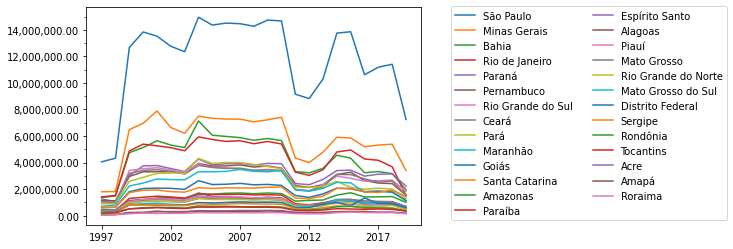

In [10]:
ax0= dados_por_total.T.plot()
ax0.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax0.yaxis.set_minor_locator(MultipleLocator(1000000))
plt.legend(loc='lower center', bbox_to_anchor=(1.5, 0), ncol=2)
plt.show()

A analise explotaroria trouxe um insight sobre um queda nas vacinações entre 2009 a 2014, a qual será trabalha após, concluir o objetivo primario que era analisar a região sul e o Rio Grande do Sul. 


### Analise Explanatoria 

Aqui os dados serão "derretido" para poder se usar os graficos do seaborn que foram estudados

In [11]:
dados_melt = dados_por_total.reset_index().melt(id_vars=["uf"], value_vars=dados_por_total.columns)
dados_melt = dados_melt.rename(columns={'value':'cobertura'})
dados_melt = dados_melt.rename(columns={'variable':'ano'})
dados_melt['ano'] = dados_melt['ano'].astype('datetime64')
dados_melt['ano'] = dados_melt['ano'].dt.year
dados_melt

,uf,ano,cobertura
0,São Paulo,1997,4052597
1,Minas Gerais,1997,1796982
2,Bahia,1997,1358301
3,Rio de Janeiro,1997,1409487
4,Paraná,1997,1258159
...,...,...,...
616,Rondônia,2019,344707
617,Tocantins,2019,337453
618,Acre,2019,183891
619,Amapá,2019,165800


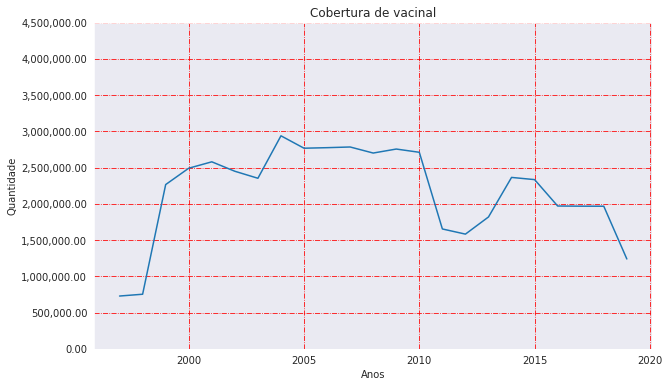

In [12]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
ax1 = sns.lineplot(data=dados_melt, x="ano", y="cobertura", ci=None)
plt.title('Cobertura de vacinal')
plt.xlabel('Anos')
plt.ylabel('Quantidade')
plt.grid(linestyle="-.", color='red')

ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax1.yaxis.set_minor_locator(MultipleLocator(1000000))
plt.ylim(0,4500000)
plt.show()

#### A analise explotarotia trouxe um insight sobre um queda nas vacinações entre 2009 a 2014, a qual será trabalha após, concluir o objetivo primario que era analisar a região sul e o Rio Grande do Sul. 

In [13]:
dados_por_total_sul = dados.iloc[20:23]

dados_melt_sul = dados_por_total_sul.reset_index().melt(id_vars=["uf"], value_vars=dados_por_total.columns)
dados_melt_sul = dados_melt_sul.rename(columns={'value':'cobertura'})
dados_melt_sul = dados_melt_sul.rename(columns={'variable':'ano'})
dados_melt_sul['ano'] = dados_melt_sul['ano'].astype('datetime64')
dados_melt_sul['ano'] = dados_melt_sul['ano'].dt.year
dados_melt_sul

,uf,ano,cobertura
0,Paraná,1997,1258159
1,Santa Catarina,1997,616029
2,Rio Grande do Sul,1997,990645
3,Paraná,1998,1056241
4,Santa Catarina,1998,618793
...,...,...,...
64,Santa Catarina,2018,1933449
65,Rio Grande do Sul,2018,2675382
66,Paraná,2019,2226662
67,Santa Catarina,2019,1436410


### Comparação absoluta

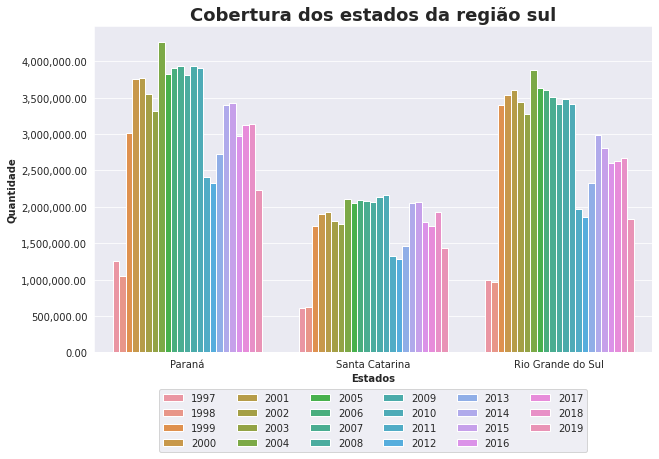

In [14]:
plt.figure(figsize=(10,6))
ax2 = sns.barplot(data=dados_melt_sul, x='uf', y='cobertura', hue='ano')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax2.yaxis.set_minor_locator(MultipleLocator(1000000))
plt.legend(loc='lower center', bbox_to_anchor=(.5, -0.32), ncol=6)
plt.title('Cobertura dos estados da região sul', fontsize=18, fontweight=900)
plt.xlabel('Estados',fontweight=650)
plt.ylabel('Quantidade',fontweight=650)

plt.show()

## Analise do Rio Grande do Sul

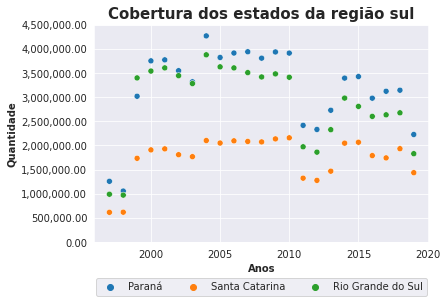

In [15]:
markers = {"Paraná": "s", "Santa Catarina": "X", "Rio Grande do Sul": "d"}
ax3 = sns.scatterplot(data=dados_melt_sul, x='ano', y='cobertura', hue='uf', markers=markers)
plt.title('Cobertura de vacinal')
plt.xlabel('Anos')
plt.ylabel('Quantidade')
plt.legend(loc='lower center', bbox_to_anchor=(.5, -0.27), ncol=3)
plt.title('Cobertura dos estados da região sul', fontsize=15, fontweight=900)
plt.xlabel('Anos',fontweight=650)
plt.ylabel('Quantidade',fontweight=650)


ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax3.yaxis.set_minor_locator(MultipleLocator(1000000))
plt.ylim(0,4500000)
plt.show()

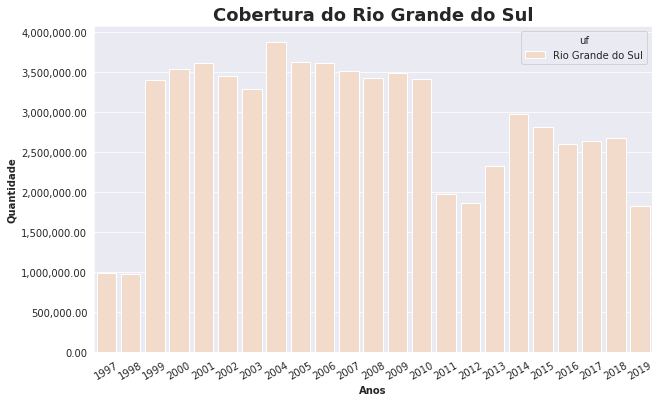

In [16]:
dados_melt_rs = dados_melt.query("uf == 'Rio Grande do Sul'")


plt.figure(figsize=(10,6))

ax3 = sns.barplot(data=dados_melt_rs, x='ano', y='cobertura', hue='uf',  palette=sns.color_palette("rocket_r", 22))

ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax3.yaxis.set_minor_locator(MultipleLocator(1000000))

plt.title('Cobertura do Rio Grande do Sul', fontsize=18, fontweight=900)
plt.xlabel('Anos',fontweight=750)
plt.xticks(rotation=30)
plt.ylabel('Quantidade',fontweight=750)
plt.show()

A media da quantidade de vacinas é

In [17]:
dados_melt_rs['cobertura'].sum()/23

2862746.5217391304

In [18]:
dados_melt_rs['cobertura'].median()

3280867.0

### Analise de 2012

In [19]:
anos=[2009, 2010, 2011, 2012, 2013, 2014]
anos_escolhidos = dados_melt_sul.query("ano in @anos").groupby(['uf','ano']).sum().reset_index()
anos_escolhidos

,uf,ano,cobertura
0,Paraná,2009,3934622
1,Paraná,2010,3911435
2,Paraná,2011,2415754
3,Paraná,2012,2330836
4,Paraná,2013,2728430
5,Paraná,2014,3393790
6,Rio Grande do Sul,2009,3480942
7,Rio Grande do Sul,2010,3411391
8,Rio Grande do Sul,2011,1972214
9,Rio Grande do Sul,2012,1861452


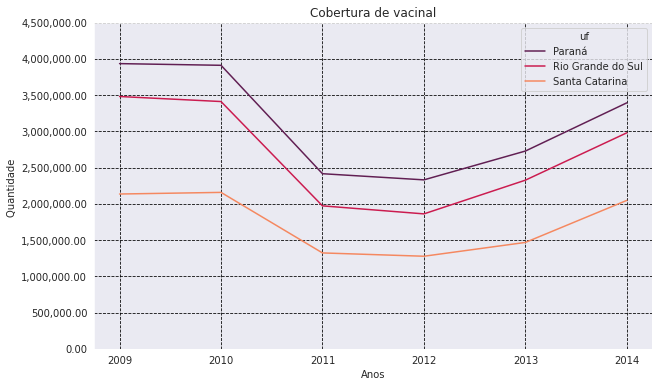

In [20]:

plt.figure(figsize=(10,6))
ax3 = sns.lineplot(data=anos_escolhidos, x="ano", y="cobertura", hue='uf', palette='rocket')
plt.title('Cobertura de vacinal')
plt.xlabel('Anos')
plt.ylabel('Quantidade ')
plt.grid(linestyle="--", color='black')
sns.set_palette('rocket')
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax3.yaxis.set_minor_locator(MultipleLocator(1000000))
plt.ylim(0,4500000)
plt.show()

## Conclusões:


Por mais que as pupulações de Paraná e Rio Grande do Sul sejam muito parecidas, o para tem um almento na cobertura vacinal um tanto considaravel.

No Rio Grande do Sul,  segue-se uma media de: 2 862 746.52 de vacinações, e uma mediana de: 3280867.0

Os motivos para esta baixa, em  2012, são inconclusivos, pois tem se  o inicio de movimnetos anti-vacinas, e tambem, a mudança do sistema para computar vacinas. Então no caso pode ser que esta baixa seja apenas computacional e nao um reflexo da realidade. 

## Trabalhos futuros:

Arrumar o grafico de barras, para deixar comforme for crescendo a quatidade de vacinas as barras irem escurecendo.